<a href="https://colab.research.google.com/github/IsmailSayyyed/deep-learning-lab1/blob/main/Experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 369, 459, 44, 68, 4731, 5, 181, 8, 607, 4, 6791, 3

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5204 - loss: 0.6914 - val_accuracy: 0.7092 - val_loss: 0.6336
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7522 - loss: 0.5441 - val_accuracy: 0.8558 - val_loss: 0.3623
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8533 - loss: 0.3433 - val_accuracy: 0.8735 - val_loss: 0.3155
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8835 - loss: 0.2895 - val_accuracy: 0.8728 - val_loss: 0.3028
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8985 - loss: 0.2502 - val_accuracy: 0.8771 - val_loss: 0.2933


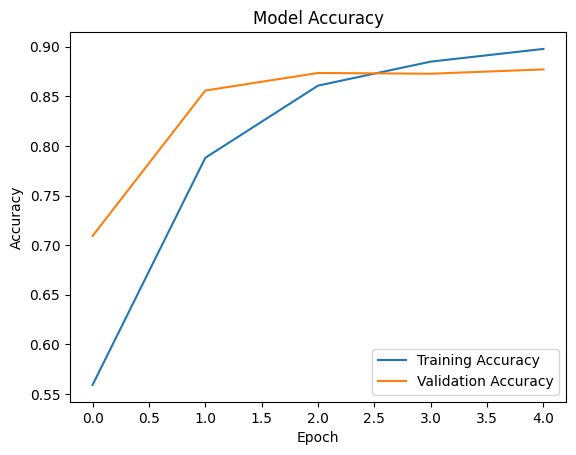

In [16]:
# Ensure reproducibility
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)

from tensorflow import keras
import matplotlib.pyplot as plt

# Load IMDb dataset
imdb = keras.datasets.imdb
num_words = 20000  # Limit vocabulary size
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1, num_words=num_words)

# Print first review data (encoded)
print(train_data[0])
print('label:', train_labels[0])

# Load vocabulary and adjust indices
vocabulary = imdb.get_word_index()
vocabulary = {k: (v + 3) for k, v in vocabulary.items()}
vocabulary["<PAD>"] = 0
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # Unknown
vocabulary["<UNUSED>"] = 3

# Reverse vocabulary mapping (int -> word)
index = {v: k for k, v in vocabulary.items()}

# Function to decode a review from encoded format
def decode_review(text):
    return ' '.join([index.get(i, '?') for i in text])

# Decode first review for verification
print(decode_review(train_data[0]))

# Pad sequences to a fixed length
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, value=vocabulary["<PAD>"], padding='post', maxlen=256
)
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, value=vocabulary["<PAD>"], padding='post', maxlen=256
)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Embedding(num_words, 2, input_length=256),
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Display model summary
model.summary()

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data, train_labels,
    epochs=5, batch_size=100,
    validation_data=(test_data, test_labels),
    verbose=1
)

# Function to plot accuracy
def plot_accuracy(history, miny=None):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    if miny:
        plt.ylim(miny, 1.0)
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy
plot_accuracy(history)
